In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

path = '../../shared_data/round3/'
days = [0, 1, 2]

activity = [pd.read_csv(path + f'prices_round_3_day_{d}.csv', sep=';') for d in days]
activity = pd.concat(activity)
activity.set_index(['product', 'day', 'timestamp'], inplace=True)
activity

bid_price_1  bid_volume_1  bid_price_2  \
product      day timestamp                                           
CHOCOLATE    0   0                 7999           111          NaN   
STRAWBERRIES 0   0                 3999           210          NaN   
ROSES        0   0                14999            72          NaN   
GIFT_BASKET  0   0                71348            19      71347.0   
                 100              71344             1      71343.0   
...                                 ...           ...          ...   
             2   999800           69537             2      69536.0   
CHOCOLATE    2   999900            7749           143          NaN   
GIFT_BASKET  2   999900           69551             1      69550.0   
STRAWBERRIES 2   999900            3984           240          NaN   
ROSES        2   999900           14411            59          NaN   

                            bid_volume_2  bid_price_3  bid_volume_3  \
product      day timestamp                                            
CHOCOLATE    0   0                   NaN          NaN           NaN   
STRAWBERRIES 0   0                   NaN          NaN           NaN   
ROSES        0   0                   NaN          NaN           NaN   
GIFT_BASKET  0   0                  24.0          NaN           NaN   
                 100                12.0      71342.0          20.0   
...                                  ...          ...           ...   
             2   999800             18.0      69535.0          24.0   
CHOCOLATE    2   999900              NaN          NaN           NaN   
GIFT_BASKET  2   999900             19.0      69549.0          20.0   
STRAWBERRIES 2   999900              NaN          NaN           NaN   
ROSES        2   999900              NaN          NaN           NaN   

                            ask_price_1  ask_volume_1  ask_price_2  \
product      day timestamp                                           
CHOCOLATE    0   0                 8001           111          NaN   
STRAWBERRIES 0   0                 4001           210          NaN   
ROSES        0   0                15001            72          NaN   
GIFT_BASKET  0   0                71362            19      71363.0   
                 100              71355             1      71356.0   
...                                 ...           ...          ...   
             2   999800           69547             2      69548.0   
CHOCOLATE    2   999900            7751           143          NaN   
GIFT_BASKET  2   999900           69561             1      69562.0   
STRAWBERRIES 2   999900            3985            92       3986.0   
ROSES        2   999900           14412            59          NaN   

                            ask_volume_2  ask_price_3  ask_volume_3  \
product      day timestamp                                            
CHOCOLATE    0   0                   NaN          NaN           NaN   
STRAWBERRIES 0   0                   NaN          NaN           NaN   
ROSES        0   0                   NaN          NaN           NaN   
GIFT_BASKET  0   0                  24.0          NaN           NaN   
                 100                12.0      71357.0          20.0   
...                                  ...          ...           ...   
             2   999800             18.0      69550.0          24.0   
CHOCOLATE    2   999900              NaN          NaN           NaN   
GIFT_BASKET  2   999900             19.0      69564.0          20.0   
STRAWBERRIES 2   999900            148.0          NaN           NaN   
ROSES        2   999900              NaN          NaN           NaN   

                            mid_price  profit_and_loss  
product      day timestamp                              
CHOCOLATE    0   0             8000.0              0.0  
STRAWBERRIES 0   0             4000.0              0.0  
ROSES        0   0            15000.0              0.0  
GIFT_BASKET  0   0            71355.0              0.0  
                

In [18]:
activity.index.get_level_values('product').unique()

Index(['CHOCOLATE', 'STRAWBERRIES', 'ROSES', 'GIFT_BASKET'], dtype='object', name='product')

### CHOCOLATE

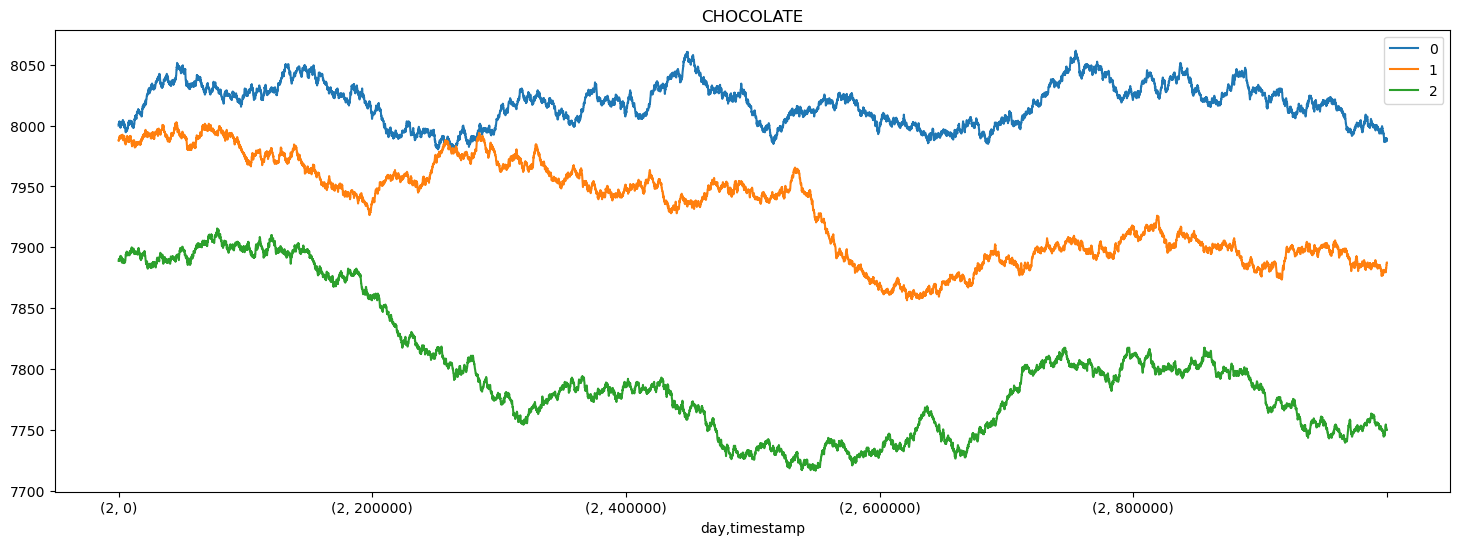

In [19]:
symbol = 'CHOCOLATE'
plt.figure(figsize=(18, 6))
activity.loc[symbol].groupby('day')['mid_price'].plot(legend=True)
plt.title(symbol)
plt.show()

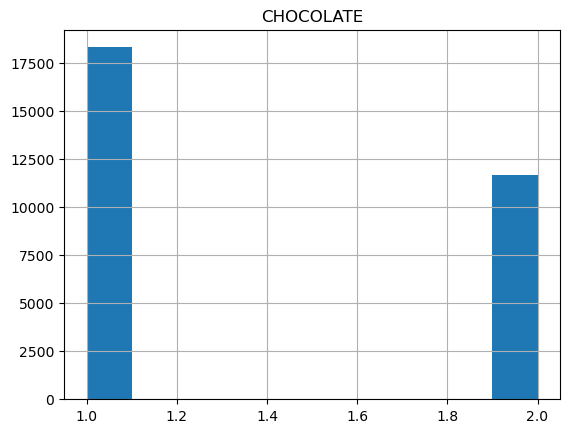

In [20]:
activity.loc[symbol].groupby('day').apply(lambda x: x['ask_price_1'] - x['bid_price_1']).hist()
plt.title(symbol)
plt.show()

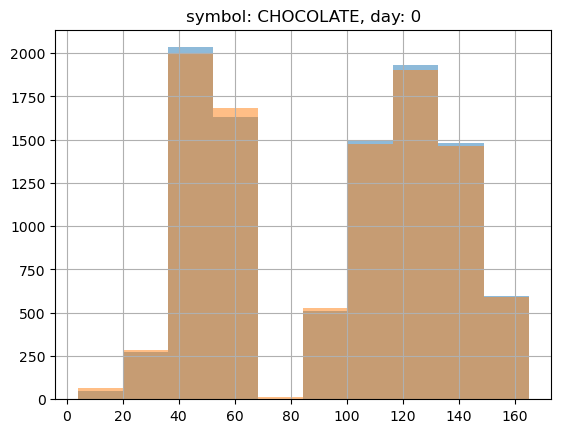

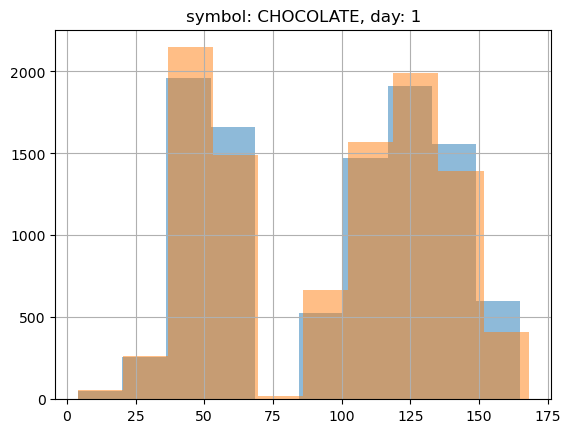

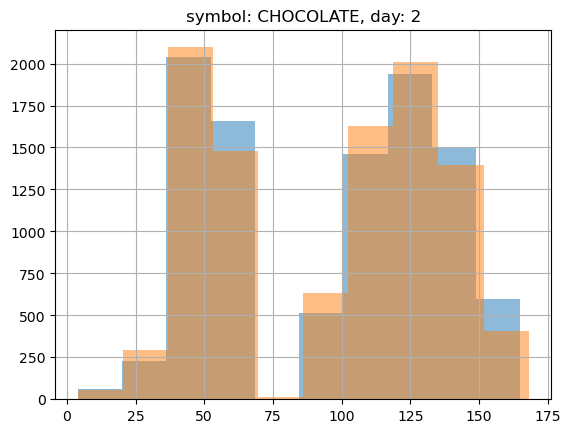

In [21]:
for d in days:
    activity.loc[symbol].loc[d]['ask_volume_1'].hist(alpha=0.5)  
    activity.loc[symbol].loc[d]['bid_volume_1'].hist(alpha=0.5)
    plt.title(f'symbol: {symbol}, day: {d}')
    plt.show()


In [43]:
activity.loc[symbol, 'mid_price'].diff().describe()

C:\Users\Meilism\AppData\Local\Temp\ipykernel_27948\264077193.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity.loc[symbol, 'mid_price'].diff().describe()


count    29999.000000
mean        -0.059969
std          8.039883
min        -29.000000
25%         -5.500000
50%          0.000000
75%          5.000000
max         31.500000
Name: mid_price, dtype: float64

### STRAWBERRIES

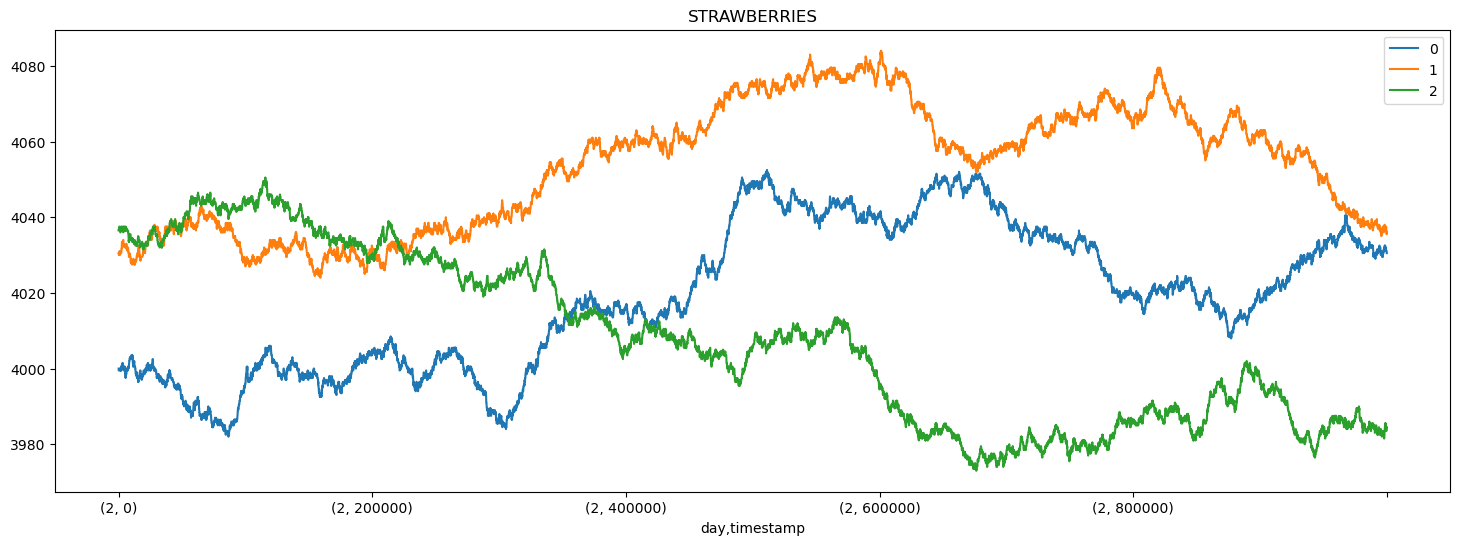

In [22]:
symbol = 'STRAWBERRIES'
plt.figure(figsize=(18, 6))
activity.loc[symbol].groupby('day')['mid_price'].plot(legend=True)
plt.title(symbol)
plt.show()

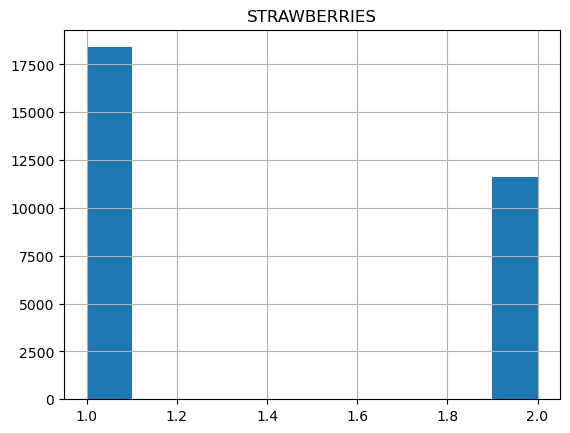

In [23]:
activity.loc[symbol].groupby('day').apply(lambda x: x['ask_price_1'] - x['bid_price_1']).hist()
plt.title(symbol)
plt.show()

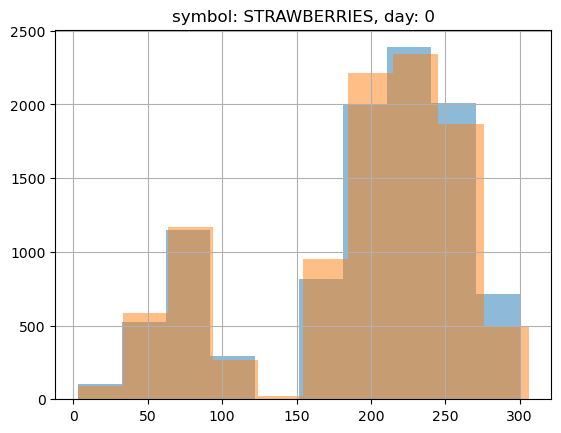

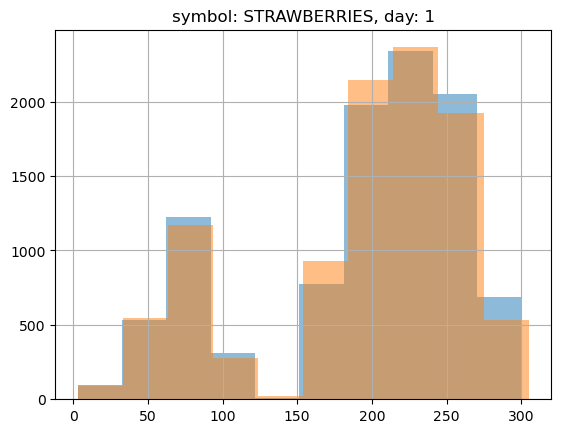

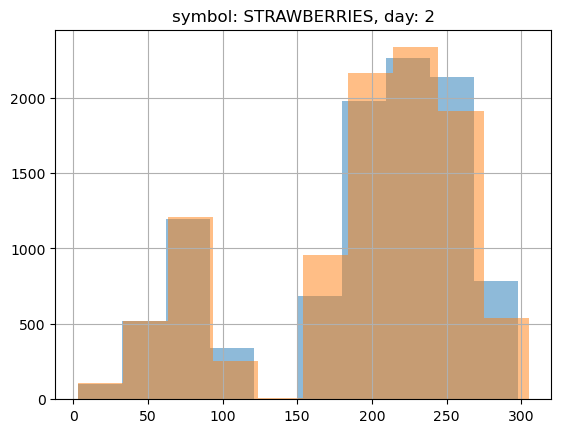

In [24]:
for d in days:
    activity.loc[symbol].loc[d]['ask_volume_1'].hist(alpha=0.5)  
    activity.loc[symbol].loc[d]['bid_volume_1'].hist(alpha=0.5)
    plt.title(f'symbol: {symbol}, day: {d}')
    plt.show()

### ROSES

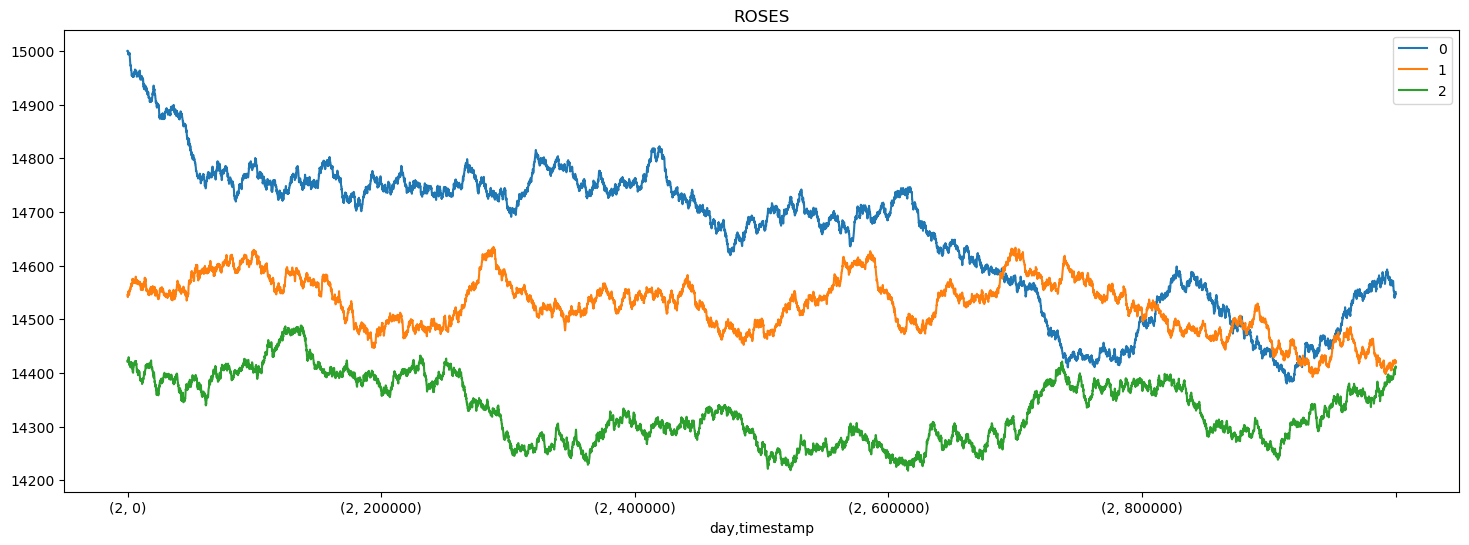

In [25]:
symbol = 'ROSES'
plt.figure(figsize=(18, 6))
activity.loc[symbol].groupby('day')['mid_price'].plot(legend=True)
plt.title(symbol)
plt.show()

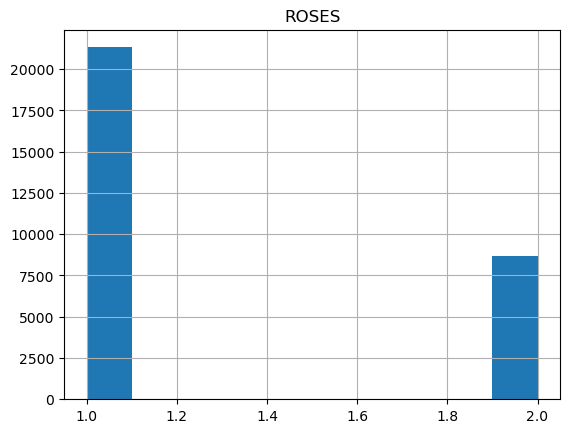

In [26]:
activity.loc[symbol].groupby('day').apply(lambda x: x['ask_price_1'] - x['bid_price_1']).hist()
plt.title(symbol)
plt.show()

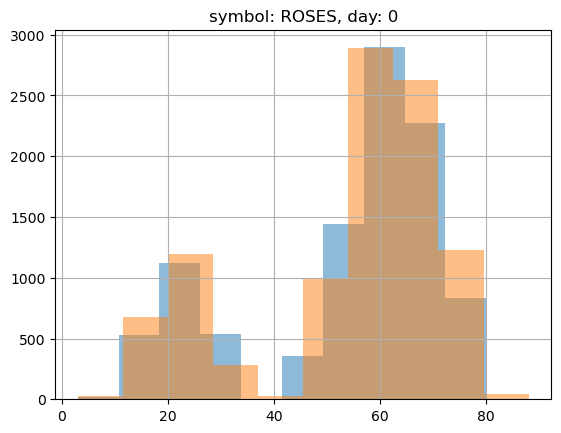

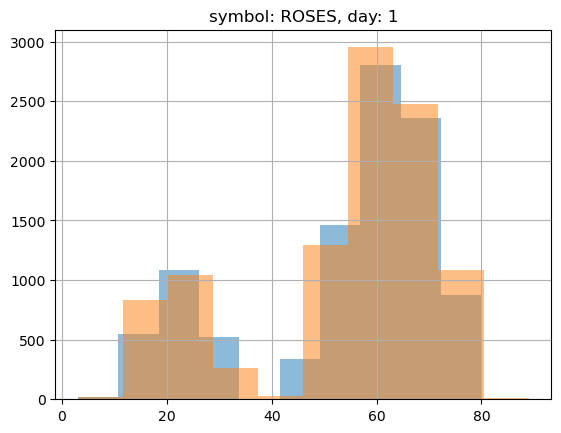

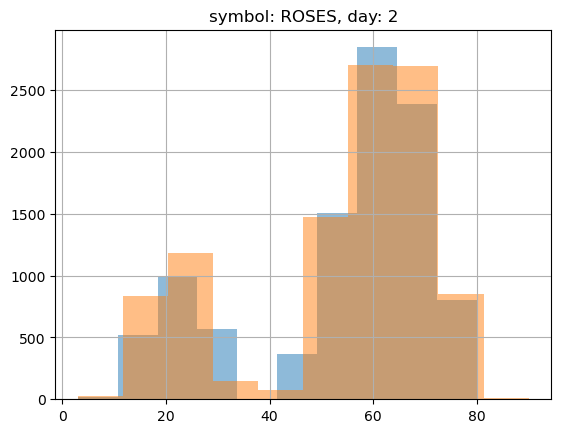

In [27]:
for d in days:
    activity.loc[symbol].loc[d]['ask_volume_1'].hist(alpha=0.5)  
    activity.loc[symbol].loc[d]['bid_volume_1'].hist(alpha=0.5)
    plt.title(f'symbol: {symbol}, day: {d}')
    plt.show()

### GIFT_BASKET

In [44]:
symbol = 'GIFT_BASKET'
plt.figure(figsize=(18, 6))
activity.loc[symbol]['mid_price'].plot(legend=True)
plt.title(symbol)
plt.show()

SyntaxError: invalid syntax (1872153356.py, line 3)

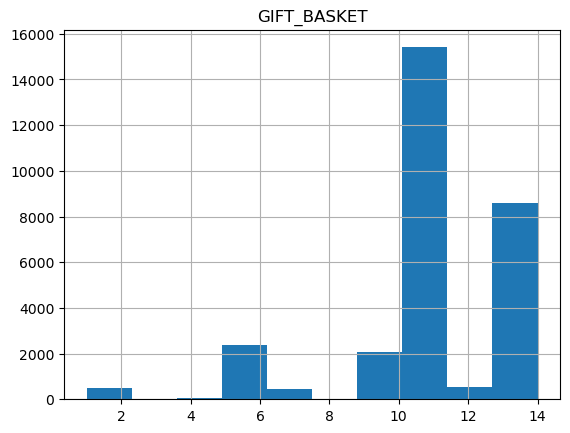

In [29]:
activity.loc[symbol].groupby('day').apply(lambda x: x['ask_price_1'] - x['bid_price_1']).hist()
plt.title(symbol)
plt.show()

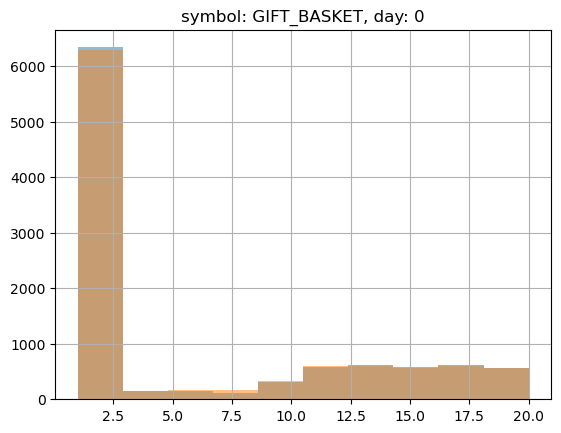

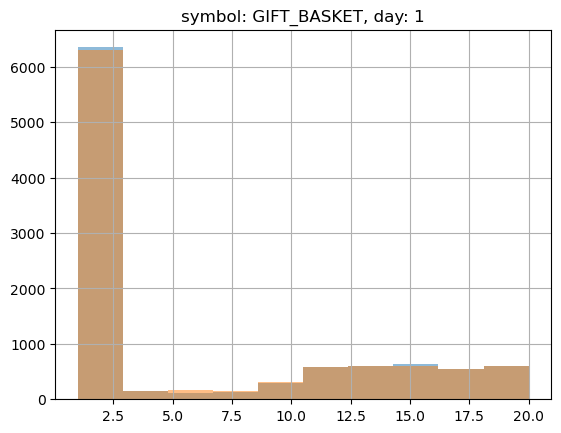

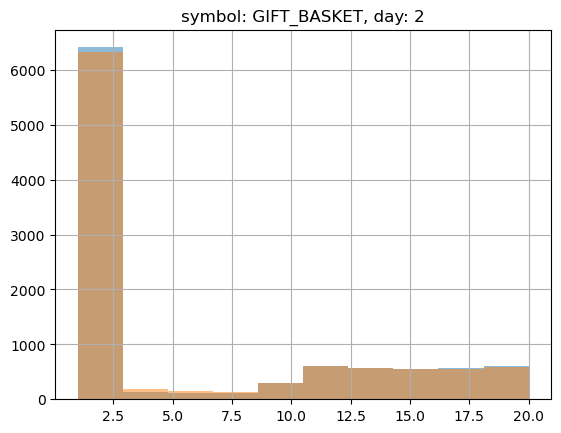

In [30]:
for d in days:
    activity.loc[symbol].loc[d]['ask_volume_1'].hist(alpha=0.5)  
    activity.loc[symbol].loc[d]['bid_volume_1'].hist(alpha=0.5)
    plt.title(f'symbol: {symbol}, day: {d}')
    plt.show()

Text(0.5, 1.0, 'GIFT_BASKET')

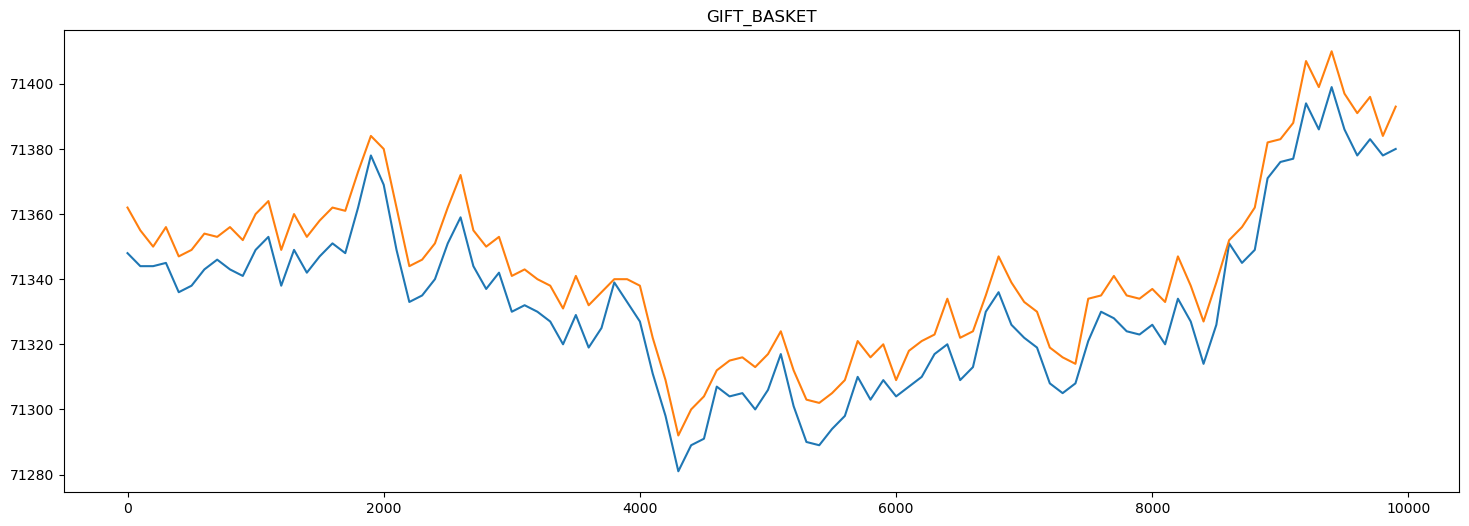

In [31]:
basket = activity.loc['GIFT_BASKET'].loc[0]

plt.figure(figsize=(18, 6))
plt.plot(basket['bid_price_1'][:100])
plt.plot(basket['ask_price_1'][:100])
plt.title('GIFT_BASKET')

### Difference

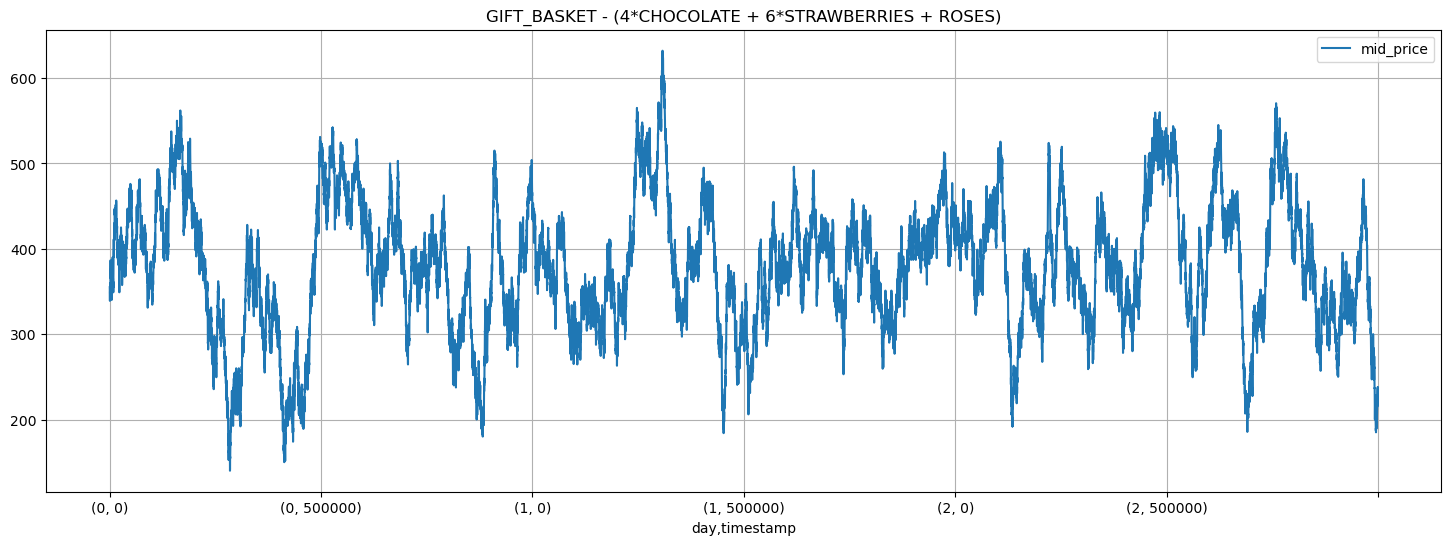

In [32]:
individual = 4*activity.loc['CHOCOLATE']['mid_price'] + 6*activity.loc['STRAWBERRIES']['mid_price'] + activity.loc['ROSES']['mid_price']
total = activity.loc['GIFT_BASKET']['mid_price']
diff = total - individual

plt.figure(figsize=(18, 6))
diff.plot(legend=True)
plt.grid()
plt.title('GIFT_BASKET - (4*CHOCOLATE + 6*STRAWBERRIES + ROSES)')
plt.show()

In [33]:
diff.describe()

count    30000.000000
mean       379.490483
std         76.424382
min        140.000000
25%        329.000000
50%        381.000000
75%        430.000000
max        632.000000
Name: mid_price, dtype: float64

In [34]:
individual_shift = individual + 379.5

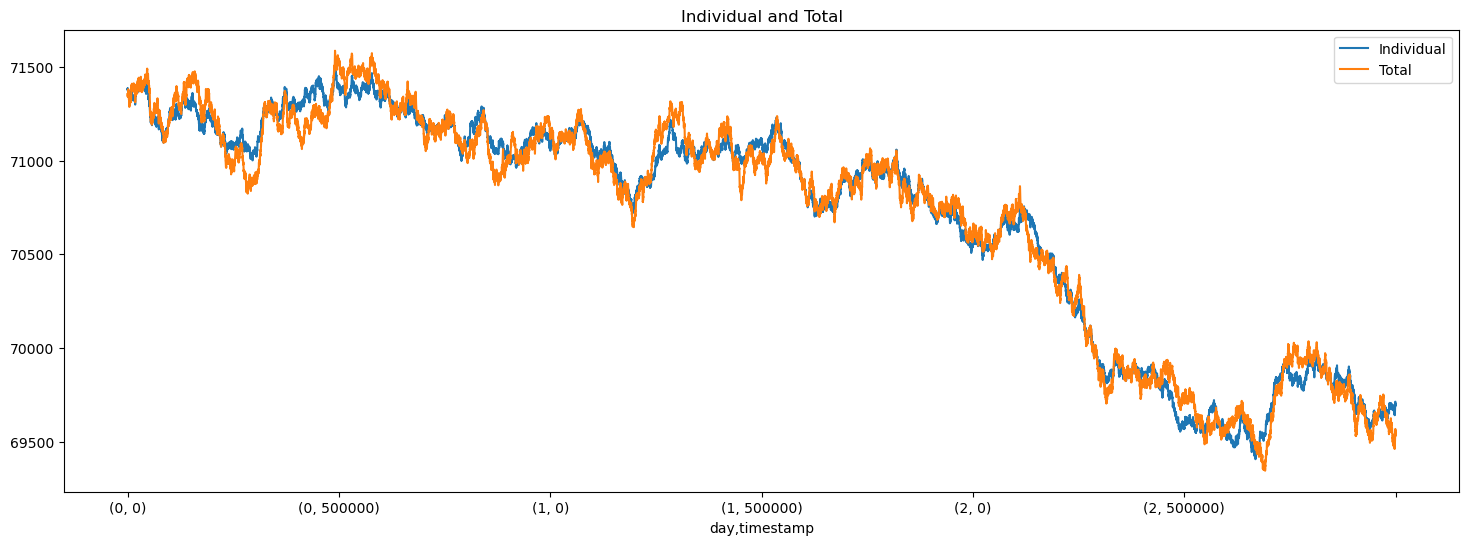

In [35]:
plt.figure(figsize=(18, 6))
individual_shift.plot(legend=True, label='Individual')
total.plot(legend=True, label='Total')
plt.title('Individual and Total')   
plt.show()

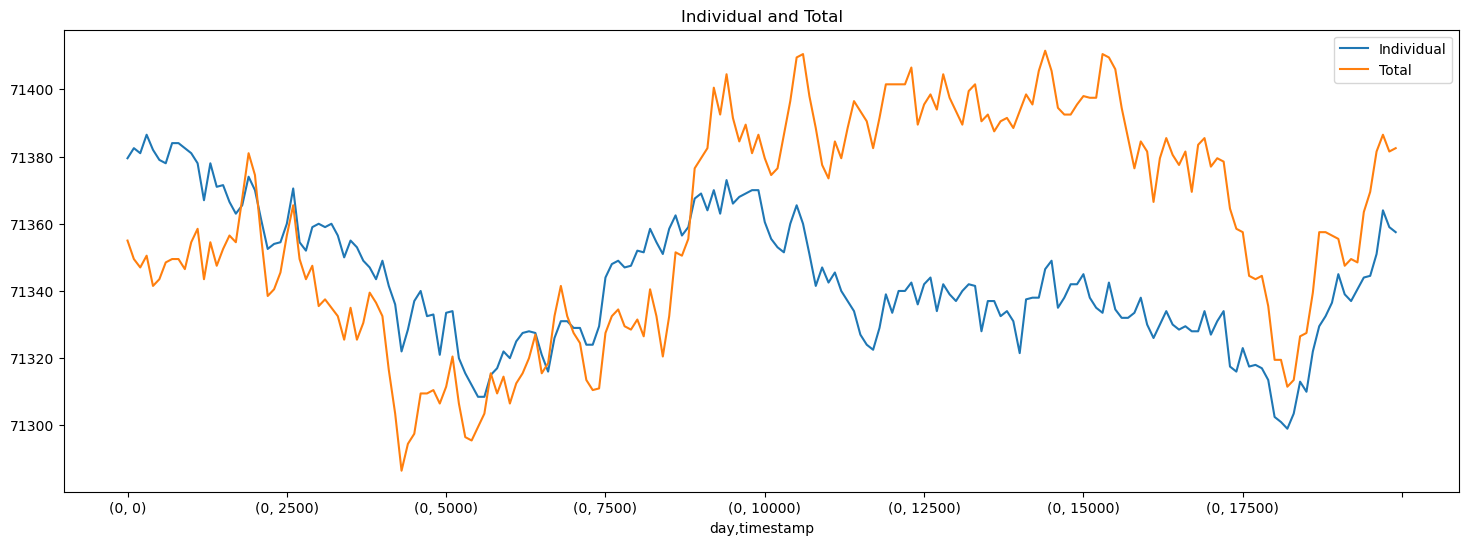

In [36]:
plt.figure(figsize=(18, 6))
individual_shift[:200].plot(legend=True, label='Individual')
total[:200].plot(legend=True, label='Total')
plt.title('Individual and Total')
plt.show()

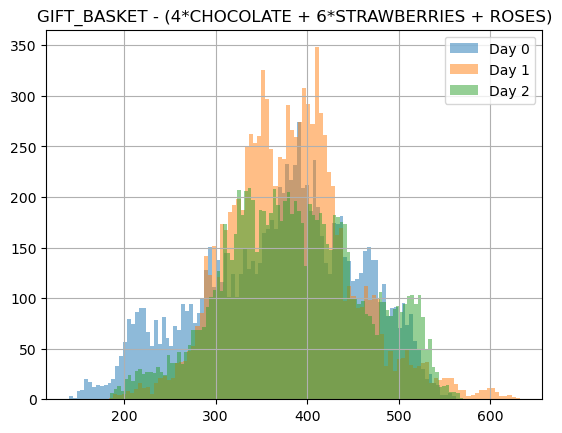

In [37]:
for d in days:
    diff.loc[d].hist(bins=100, alpha=0.5)
plt.legend([f'Day {d}' for d in days])
plt.title('GIFT_BASKET - (4*CHOCOLATE + 6*STRAWBERRIES + ROSES)')
plt.show()

In [38]:
diff.groupby('day').describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
0,10000.0,370.23060,85.293178,140.0,310.0,379.5,433.0,562.0
1,10000.0,381.94180,65.750569,184.0,337.5,380.0,419.0,632.0
2,10000.0,386.29905,76.072587,185.0,332.0,383.0,438.5,570.5


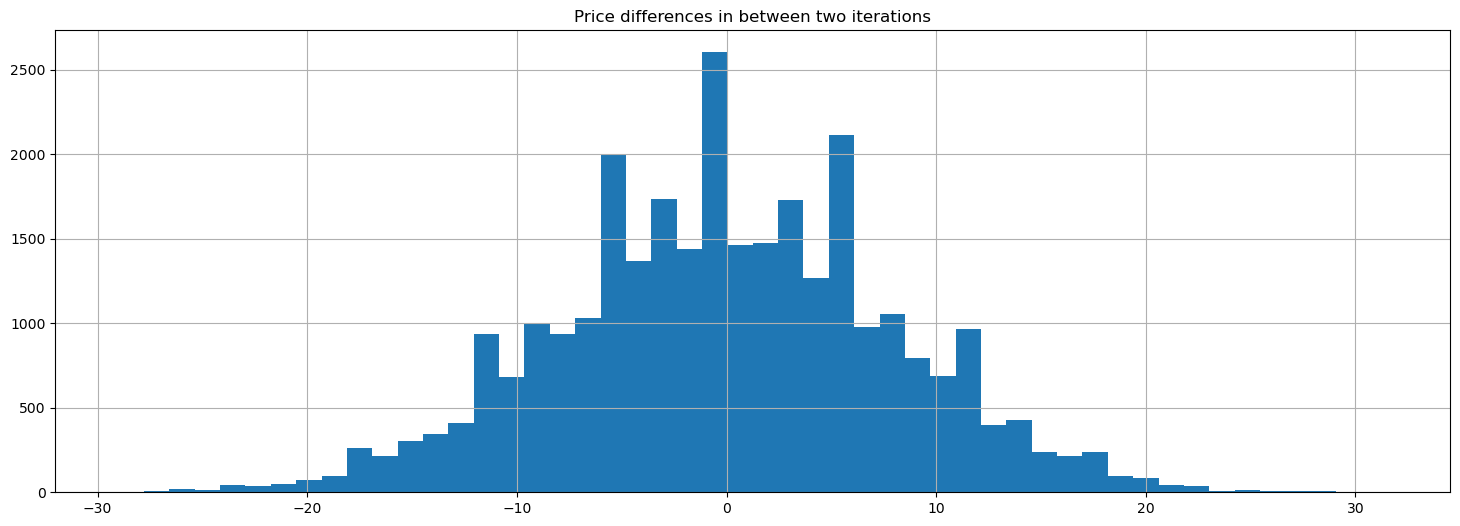

In [39]:
total.diff().hist(bins=50, figsize=(18, 6))
plt.title('Price differences in between two iterations')
plt.show()

In [40]:
total.diff().describe()

count    29999.000000
mean        -0.059969
std          8.039883
min        -29.000000
25%         -5.500000
50%          0.000000
75%          5.000000
max         31.500000
Name: mid_price, dtype: float64

In [42]:
from statsmodels.tsa.stattools import adfuller
adfuller(diff)

(-6.4463607861106675,
 1.5623227975528573e-08,
 1,
 29998,
 {'1%': -3.430568009855954,
  '5%': -2.8616363544632057,
  '10%': -2.566821286540422},
 194520.08911243273)

## Average

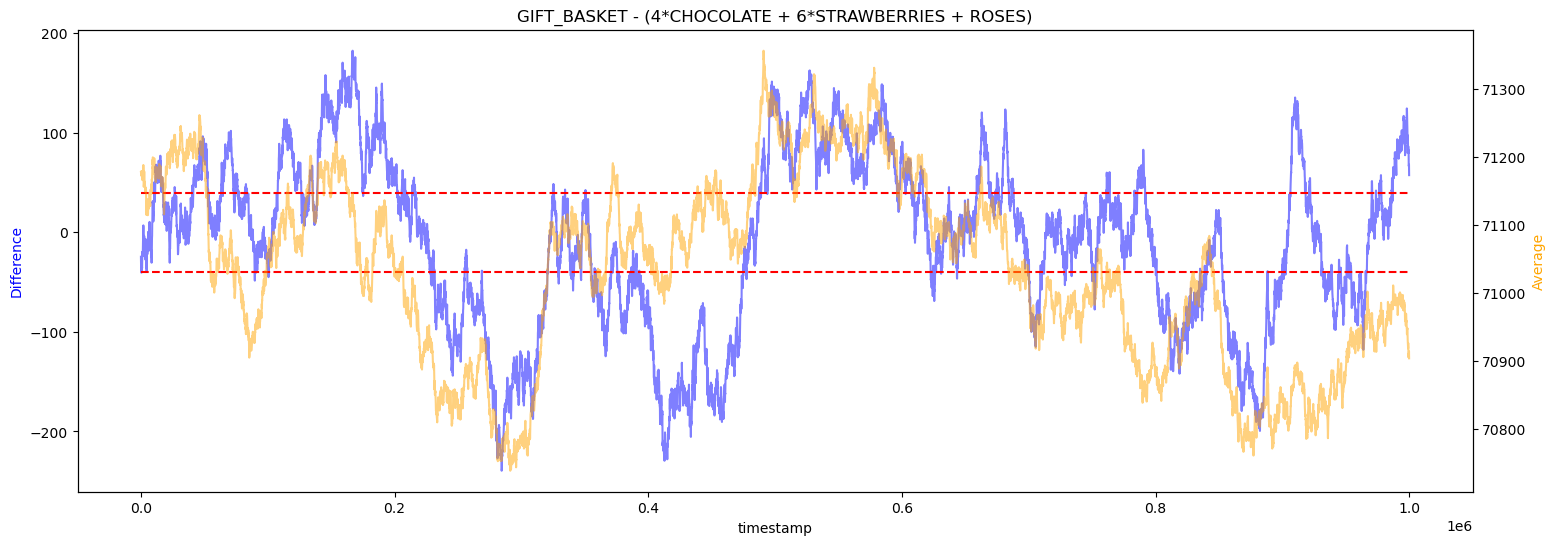

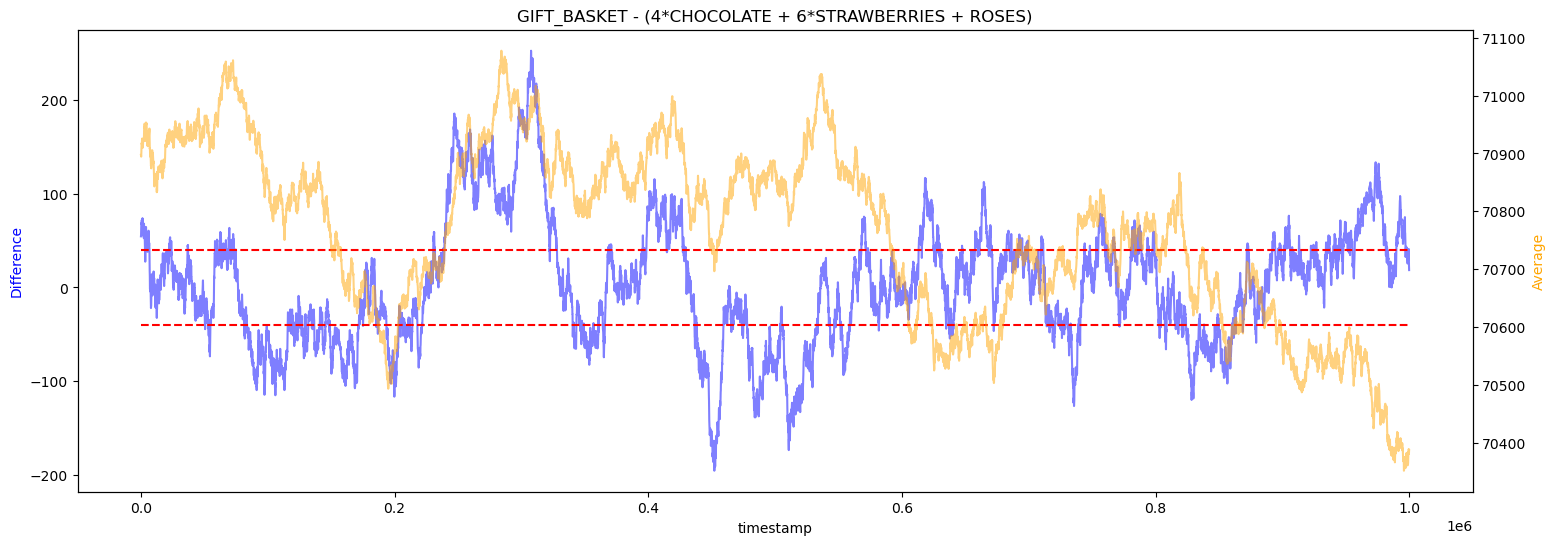

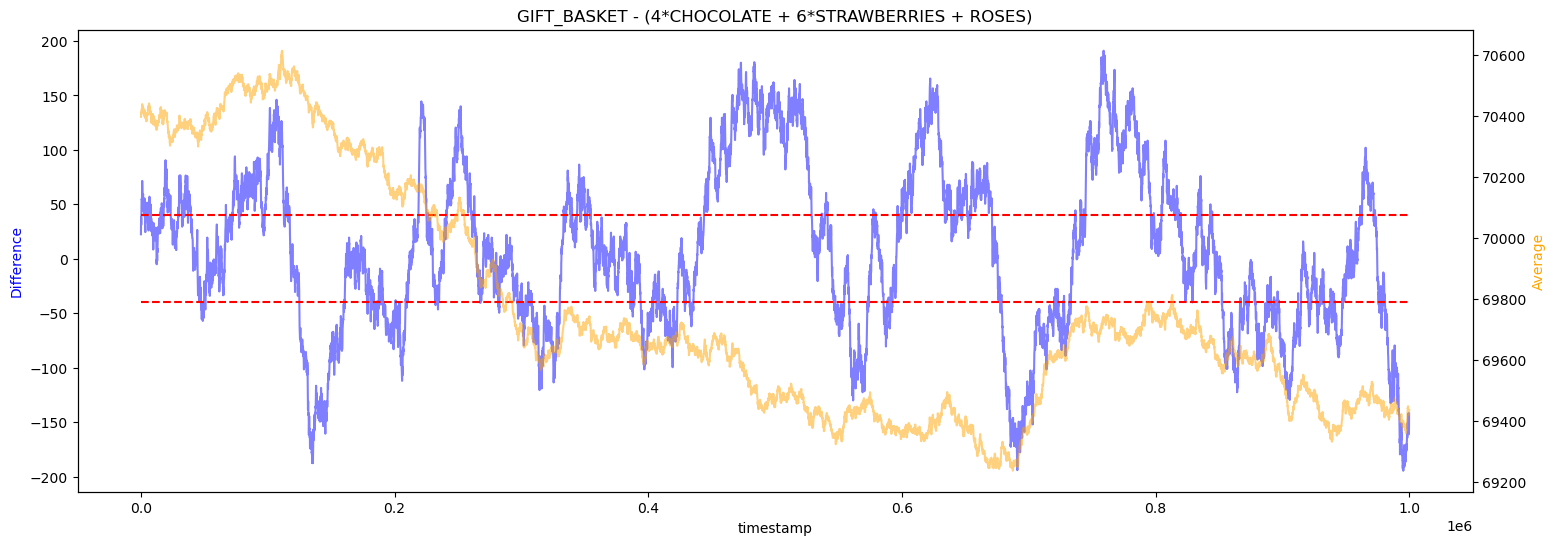

In [68]:
avg = (individual + total) / 2
diff_shift = diff - diff.mean()

for d in days:

    fig, ax = plt.subplots(figsize=(18, 6))
    ax2 = ax.twinx()
    assert isinstance(ax, plt.Axes)
    assert isinstance(ax2, plt.Axes)
    
    diff_shift.loc[d].plot(ax=ax, color='blue', alpha=0.5)
    ax.hlines(40, diff_shift.loc[d].index[0], diff_shift.loc[d].index[-1], color='r', linestyle='--')
    ax.hlines(-40, diff_shift.loc[d].index[0], diff_shift.loc[d].index[-1], color='r', linestyle='--')
    ax.set_ylabel('Difference', color='blue')
    avg.loc[d].plot(ax=ax2, color='orange', alpha=0.5)
    ax2.set_ylabel('Average', color='orange')
    plt.title('GIFT_BASKET - (4*CHOCOLATE + 6*STRAWBERRIES + ROSES)')
    plt.show()

In [70]:
data = pd.DataFrame([diff, total, individual, avg], index=['diff', 'total', 'individual', 'avg']).T
data.corr()

,diff,total,individual,avg
diff,1.000000,0.057554,-0.069746,-0.006133
total,0.057554,1.000000,0.991897,0.997971
individual,-0.069746,0.991897,1.000000,0.997974
avg,-0.006133,0.997971,0.997974,1.000000


In [71]:
from statsmodels.tsa.stattools import adfuller

for d in days:
    result = adfuller(diff_shift.loc[d])
    print(f'ADF Statistic for day {d}: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    print()

ADF Statistic for day 0: -3.3398851220439103
p-value: 0.013187062073378301
Critical Values:
	1%: -3.431004228818807
	5%: -2.8618291302145686
	10%: -2.566923898875394

ADF Statistic for day 1: -4.392222751808028
p-value: 0.00030638252085183894
Critical Values:
	1%: -3.431004228818807
	5%: -2.8618291302145686
	10%: -2.566923898875394

ADF Statistic for day 2: -3.637258891977783
p-value: 0.0050873929135020835
Critical Values:
	1%: -3.431004228818807
	5%: -2.8618291302145686
	10%: -2.566923898875394



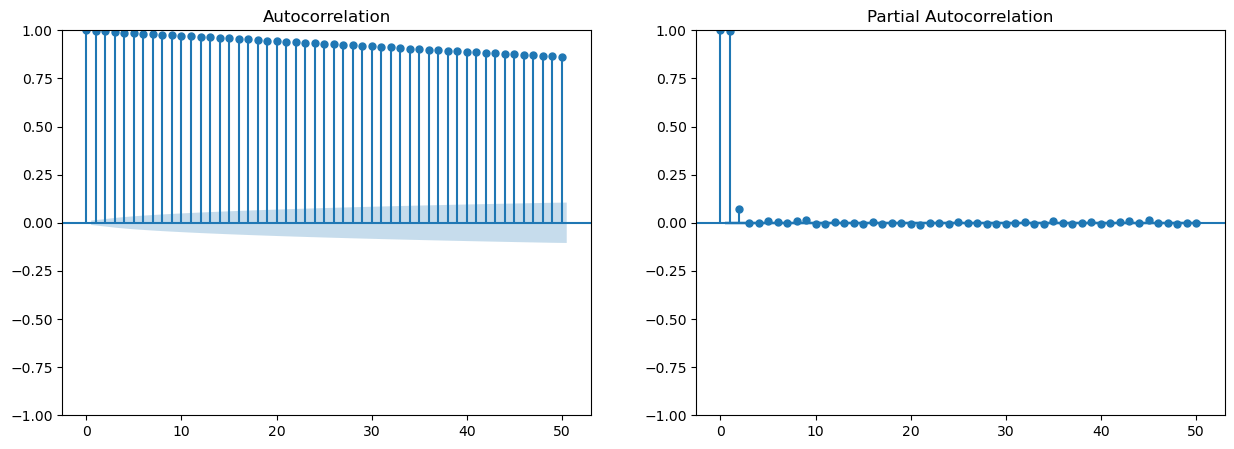

In [72]:
# plot the autocorrelation of the differences
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(diff_shift, lags=50, ax=ax[0])
plot_pacf(diff_shift, lags=50, ax=ax[1])
plt.show()

## Momentum-based trading

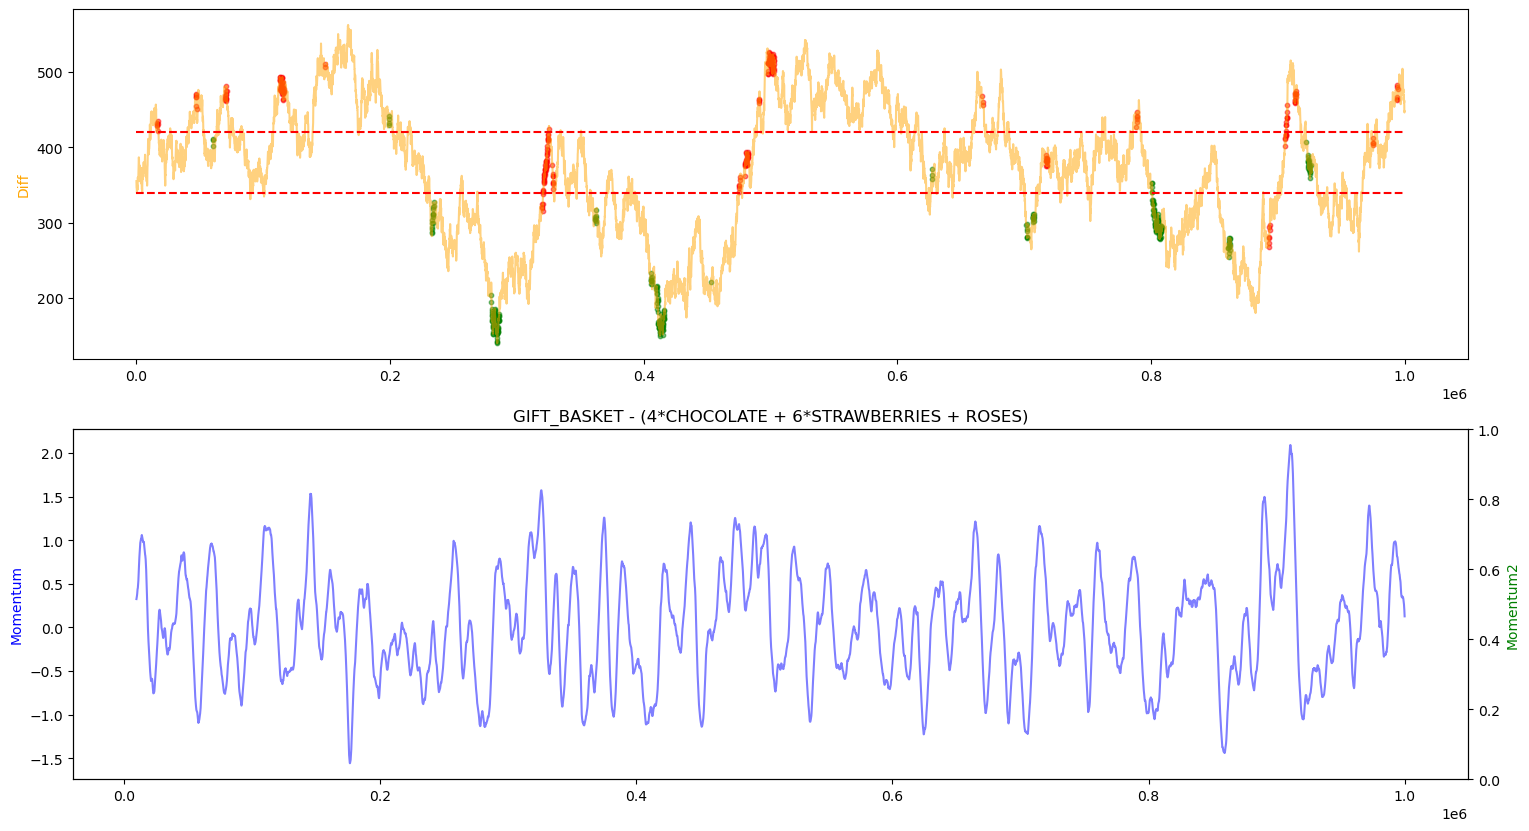

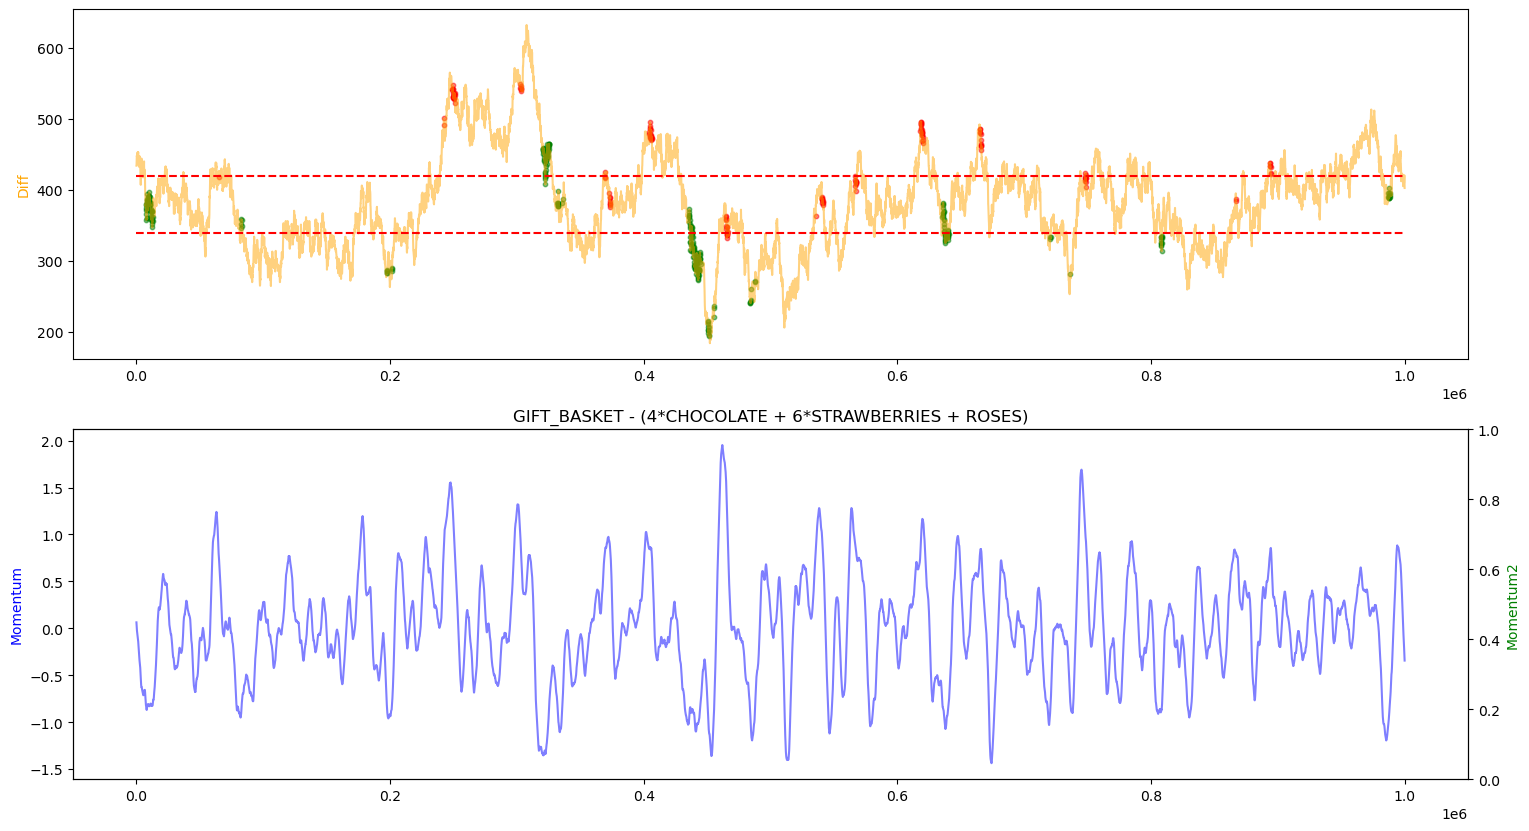

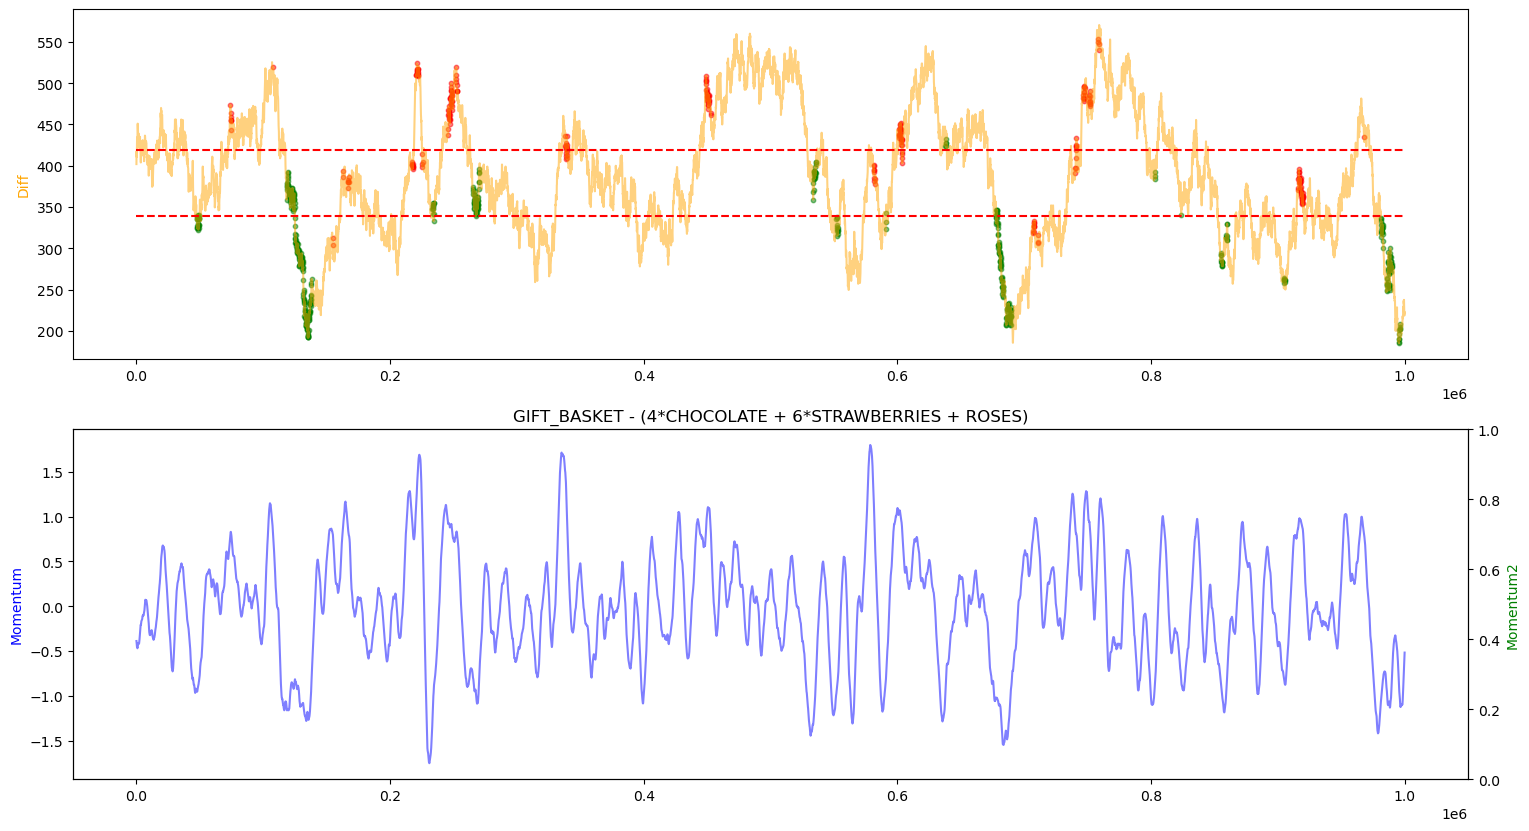

In [73]:
window_size = 100
window_size2 = 50
window_size3 = 10
sample = 9999

momentum_threshold = 0.8
momentum_threshold2 = 0.01

momentum = diff.rolling(window_size).apply(lambda x: np.polyfit(range(window_size), x, 1)[0], raw=True)
momentum2 = momentum.rolling(window_size2).apply(lambda x: np.polyfit(range(window_size2), x, 1)[0], raw=True).rolling(window_size3).mean()
sell_signal = (momentum > momentum_threshold) 
buy_signal = (momentum < -momentum_threshold)
strong_sell_signal = (abs(momentum2) < momentum_threshold2) & sell_signal
strong_buy_signal = (abs(momentum2) < momentum_threshold2) & buy_signal

for d in days:
    fig, axs = plt.subplots(2, 1, figsize=(18, 10))
    ax = axs[0]
    ax2 = axs[1]
    ax3 = ax2.twinx()
    assert isinstance(ax, plt.Axes)
    assert isinstance(ax2, plt.Axes)
    assert isinstance(ax3, plt.Axes)
    
    momentum_sample = momentum.loc[d][:sample]
    momentum2_sample = momentum2.loc[d][:sample]
    diff_sample = diff.loc[d][:sample]
    sell_sample = sell_signal.loc[d][:sample]
    buy_sample = buy_signal.loc[d][:sample]
    strong_sell_sample = strong_sell_signal.loc[d][:sample]
    strong_buy_sample = strong_buy_signal.loc[d][:sample]

    ax.plot(diff_sample, color='orange', alpha=0.5)
    # ax.scatter(sell_sample[sell_sample].index, diff_sample[sell_sample], s=10, alpha=0.5, color='red', label='Sell Signal')
    # ax.scatter(buy_sample[buy_sample].index, diff_sample[buy_sample], s=10, alpha=0.5, color='green', label='Buy Signal')
    ax.scatter(strong_sell_sample[strong_sell_sample].index, diff_sample[strong_sell_sample], s=10, alpha=0.5, color='red', label='Strong Sell Signal')
    ax.scatter(strong_buy_sample[strong_buy_sample].index, diff_sample[strong_buy_sample], s=10, alpha=0.5, color='green', label='Strong Buy Signal')
    ax.hlines(379.5+40, diff_sample.index[0], diff_sample.index[-1], color='r', linestyle='--')
    ax.hlines(379.5-40, diff_sample.index[0], diff_sample.index[-1], color='r', linestyle='--')
    ax.set_ylabel('Diff', color='orange')
    plt.title('GIFT_BASKET - (4*CHOCOLATE + 6*STRAWBERRIES + ROSES)')

    ax2.plot(momentum_sample, color='blue', alpha=0.5)
    # ax2.hlines(0.8, momentum_sample.index[0], momentum_sample.index[-1], color='r', linestyle='--')
    # ax2.hlines(-0.8, momentum_sample.index[0], momentum_sample.index[-1], color='r', linestyle='--')
    ax2.set_ylabel('Momentum', color='blue')
    # ax3.plot(momentum2_sample, color='green', alpha=0.5)
    # ax3.hlines(0.02, momentum_sample.index[0], momentum_sample.index[-1], color='r', linestyle='--')
    # ax3.hlines(-0.02, momentum_sample.index[0], momentum_sample.index[-1], color='r', linestyle='--')
    ax3.set_ylabel('Momentum2', color='green')
    plt.show()